In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from dredFISH.Utils.__init__plots import *

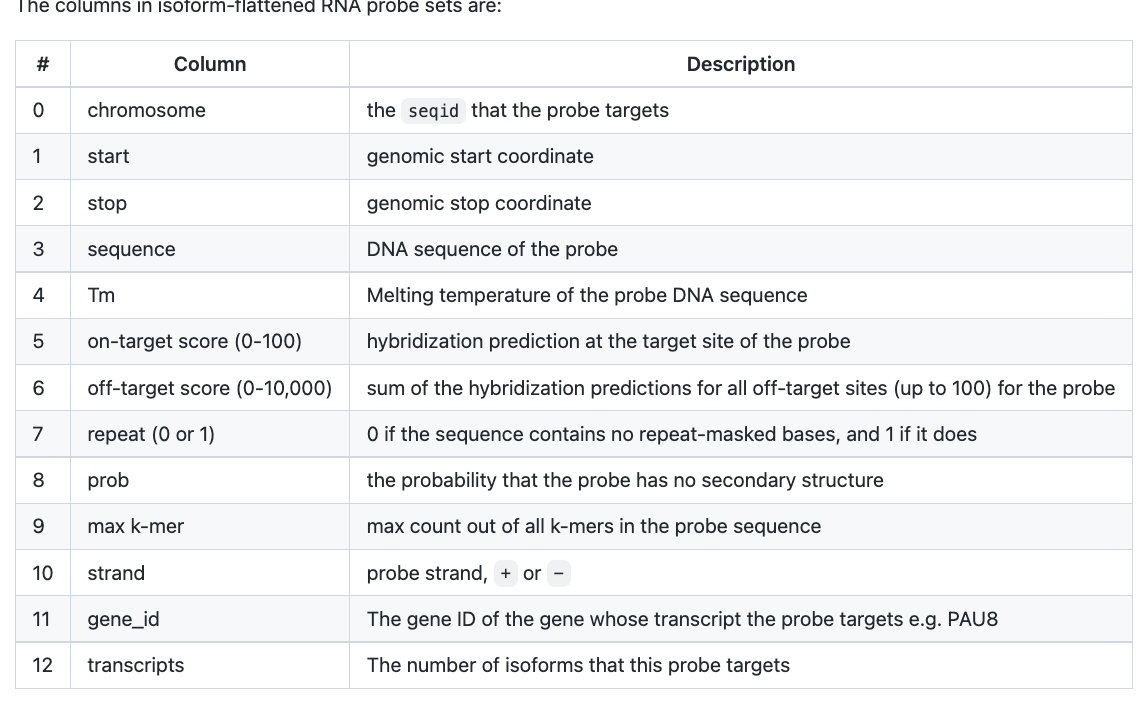

In [2]:
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)
    

In [3]:
ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test8_full_ourset/" 
f = os.path.join(ddir, "pipeline_output/03_output_files/03_rna_probes_iso/mm10_iso_newBalance.tsv")
header=[
    'chrom', 'start', 'end', # one based?
    'seq', 
    'tm', 
    'onscore',  # 0-100
    'offscore', # 0-10,000
    'repeat',
    'prob',
    'maxkmer',
    'strand',
    'gname',
    'transcripts',
]


df = pd.read_csv(f, sep="\t", header=None)
df.columns = header
df['len'] = df['end']-df['start']+1
df['gc'] = df['seq'].apply(get_gc) 
df

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214512,3214541,AAAGCACCATGACCAAGGACACCGAAAACA,41.02,35.893,0.000,0,0.455,25,+,Xkr4,1,30,0.466667
1,chr1,3214544,3214573,AAGCGGGAATGTTTACTTGCTGTGTGGAGG,41.07,49.515,0.000,0,0.346,2,+,Xkr4,1,30,0.500000
2,chr1,3214631,3214660,CTTAGCTGATGGAGTGGTAAGCCCTCAAGC,40.41,32.113,0.000,0,0.313,0,+,Xkr4,1,30,0.533333
3,chr1,3214754,3214783,TGACCTTGGATGGGAAGAGGGTAAGTCTGT,40.37,21.619,0.000,0,0.330,2,+,Xkr4,1,30,0.500000
4,chr1,3214880,3214909,AAATTTGGCACTCGAAAGATGTGGCACGTG,40.46,26.984,0.000,0,0.190,0,+,Xkr4,1,30,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125243,chrY,90839206,90839235,ATGTCTGCCTGGCATCATAGCTTTTGGCAG,41.27,41.462,64.322,0,0.258,3,+,G530011O06Rik,1,30,0.500000
1125244,chrY,90839254,90839283,TGGAACAAGTCAGTCGTTAAGAGGACCCGT,40.87,20.948,41.895,0,0.216,3,+,G530011O06Rik,1,30,0.500000
1125245,chrY,90839299,90839328,TTATCACACCAGACAGGTGCCTCAGAGACA,40.61,19.431,29.758,0,0.137,3,+,G530011O06Rik,1,30,0.500000
1125246,chrY,90839342,90839371,GGAGTCCACAGTGAGATTGGATTGCAGAGC,40.73,37.340,74.681,0,0.303,4,+,G530011O06Rik,1,30,0.533333


In [4]:
# df[df['gname'] == 'Xkr4']
(df['len'] != 30).sum(), (df['repeat'] == 1).sum()

(0, 70567)

In [5]:
cond1 = df['len']==30
cond2 = df['repeat']==0
cond = np.logical_and(cond1, cond2)

df2 = df[cond]
print(df.shape, df2.shape)

cond3 = df2['offscore']<50
df3 =  df2[cond3].copy()
print(df3.shape)

cond4 = df3['onscore']>98
df4 =  df3[cond4].copy()
print(df4.shape)

(1125248, 15) (1054681, 15)
(990922, 15)
(0, 15)


<AxesSubplot:xlabel='prob', ylabel='Count'>

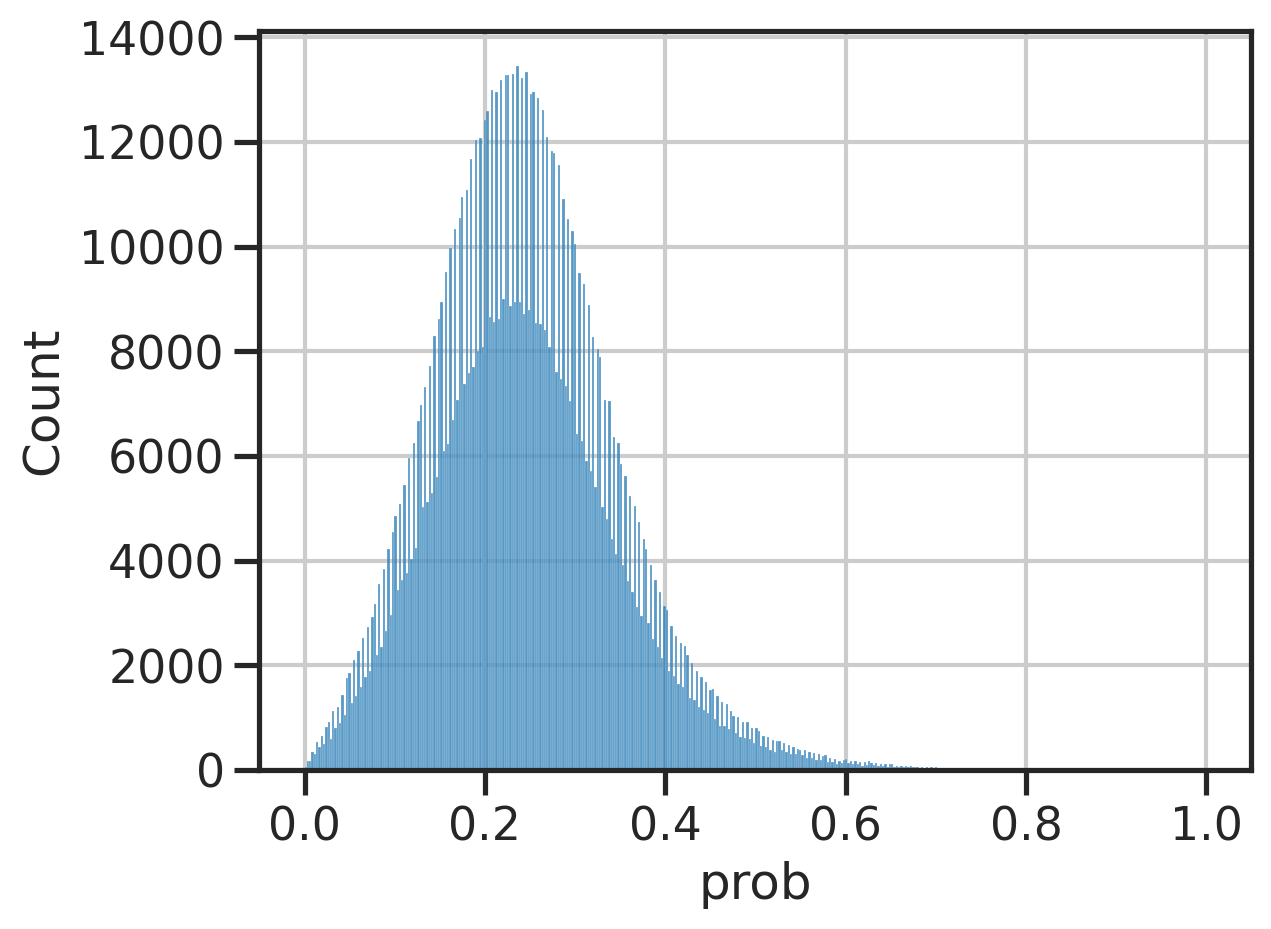

In [6]:
sns.histplot(df2['prob'])

<AxesSubplot:xlabel='prob', ylabel='Count'>

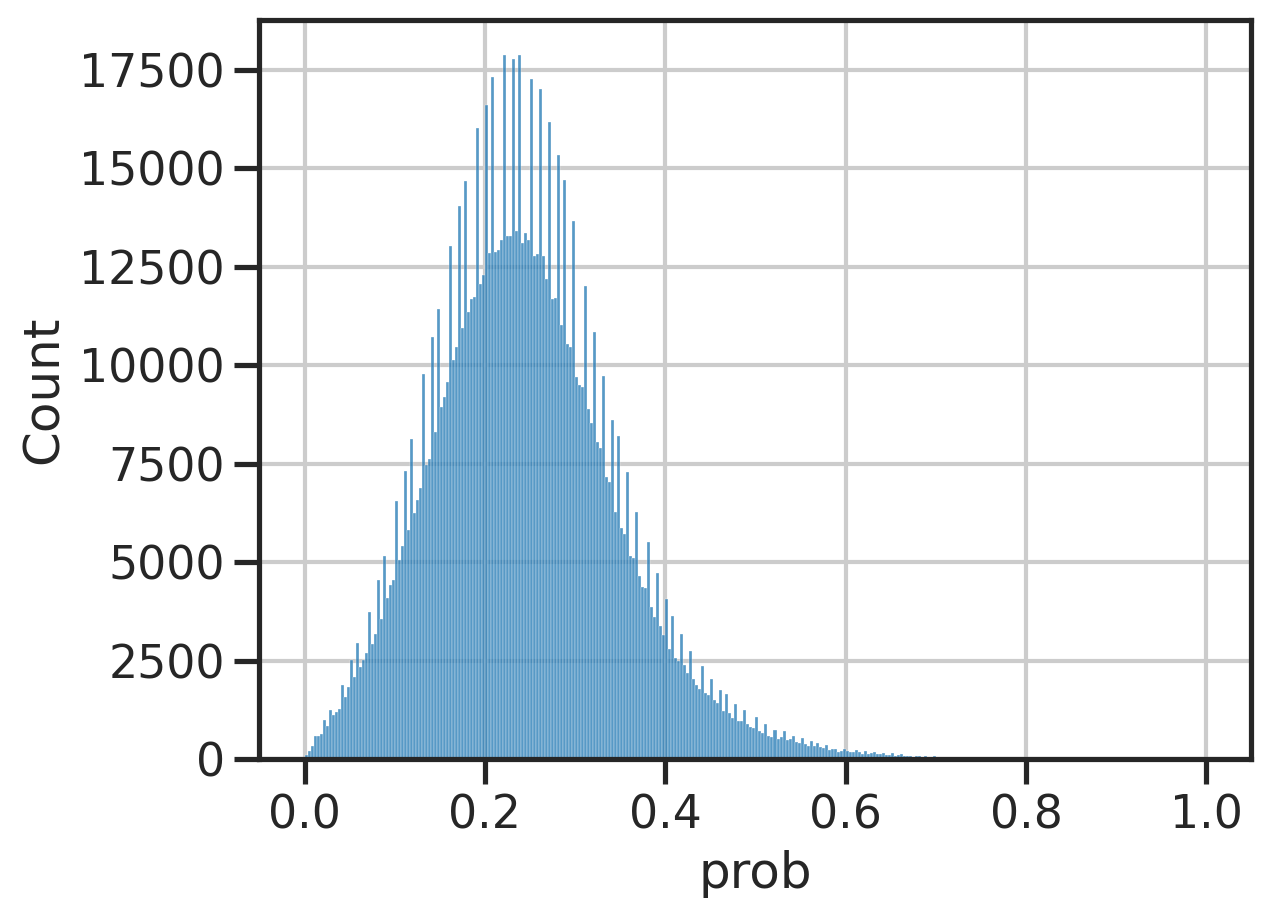

In [39]:
sns.histplot(df2['prob'], bins=300)

Text(0, 0.5, 'max k-mer')

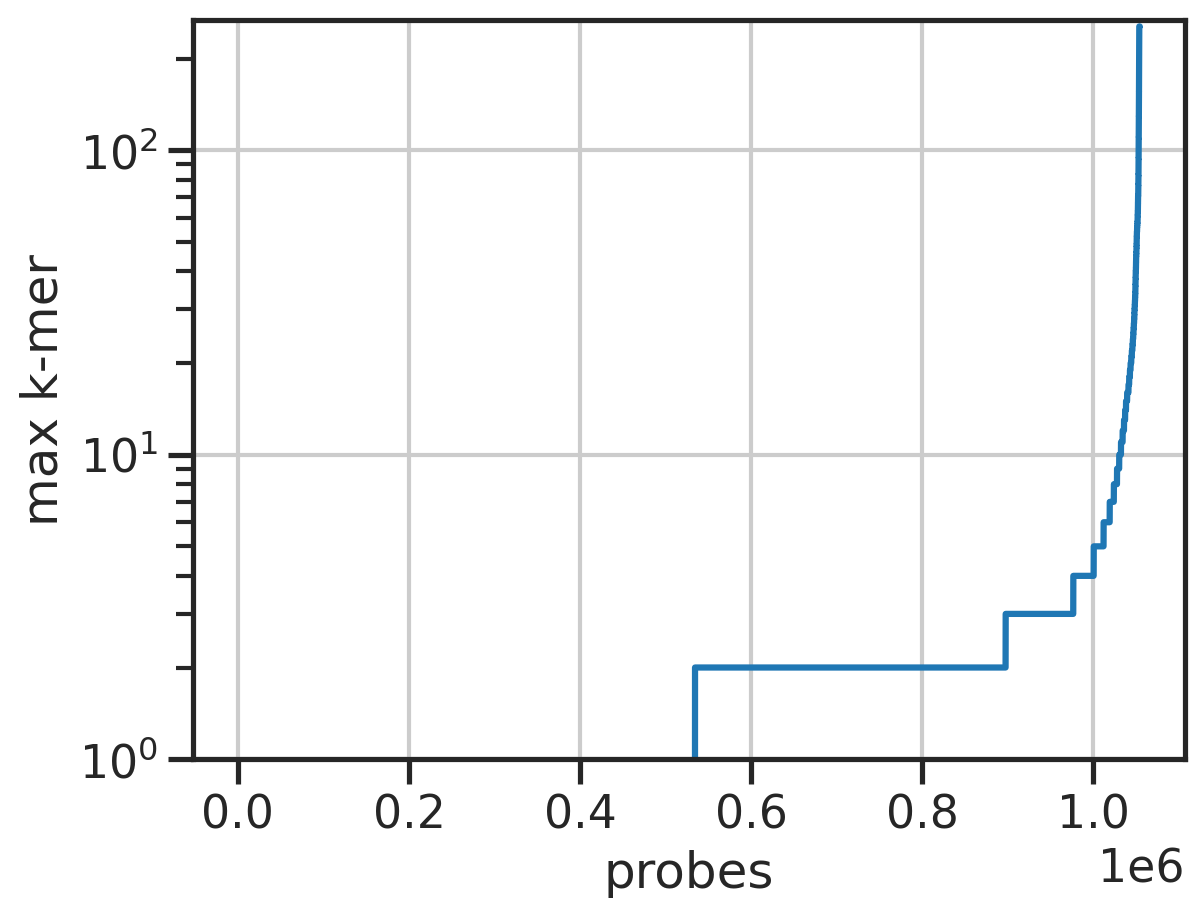

In [7]:
plt.plot(np.sort(df2['maxkmer']))
plt.ylim([1, None])
plt.yscale('log')
plt.xlabel('probes')
plt.ylabel('max k-mer')

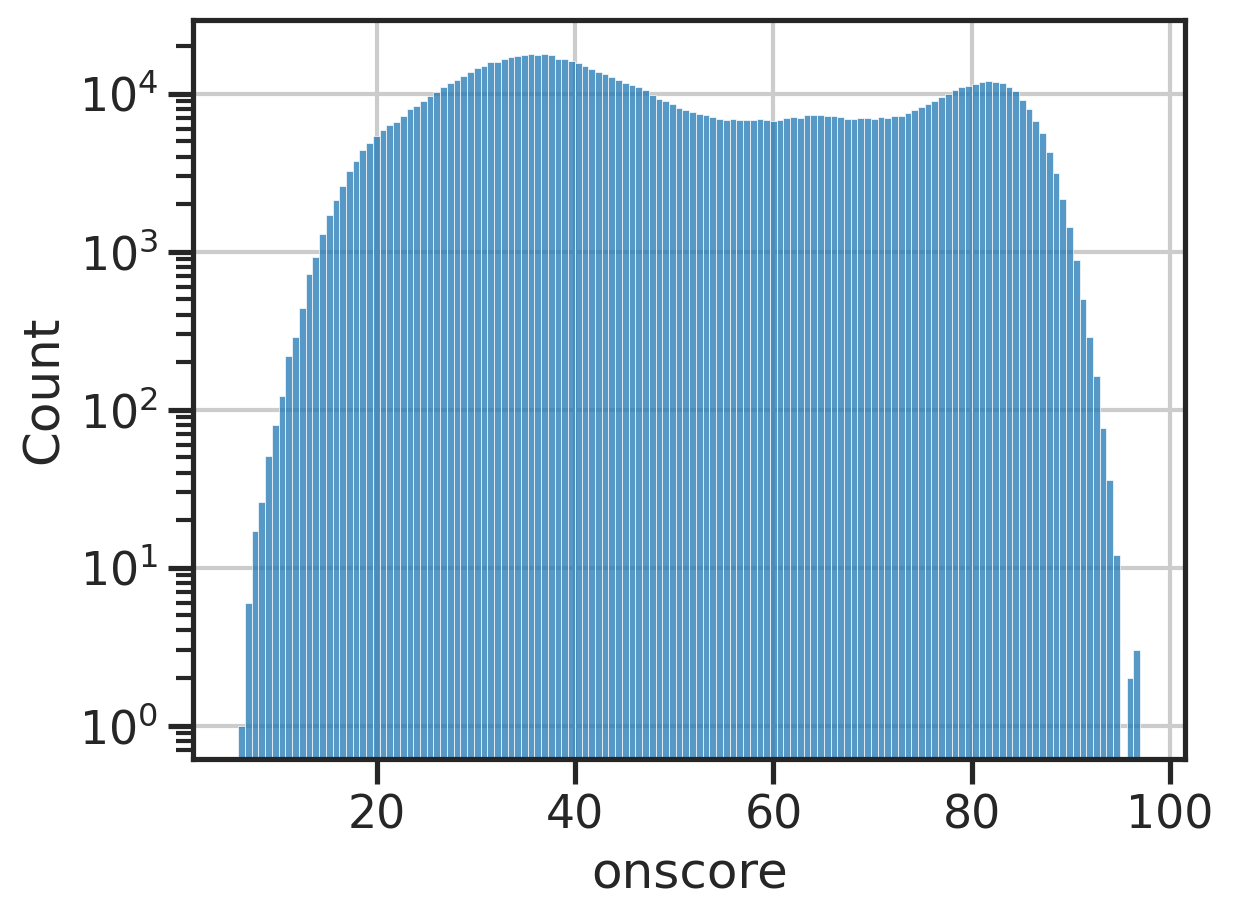

In [8]:
sns.histplot(df2['onscore'])
plt.yscale('log')

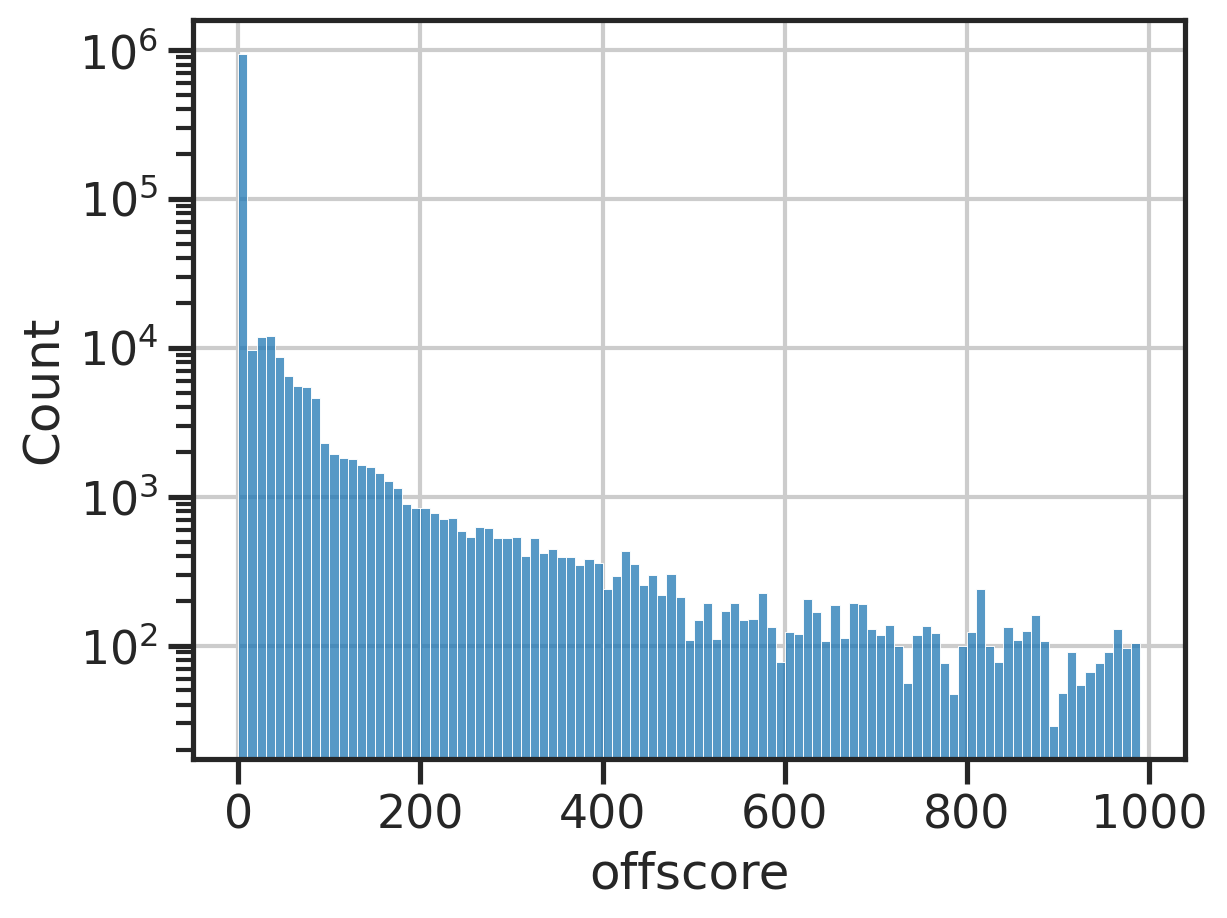

In [9]:
sns.histplot(df2['offscore'], bins=np.arange(0, 1000, 10))
plt.yscale('log')

<AxesSubplot:xlabel='gc', ylabel='tm'>

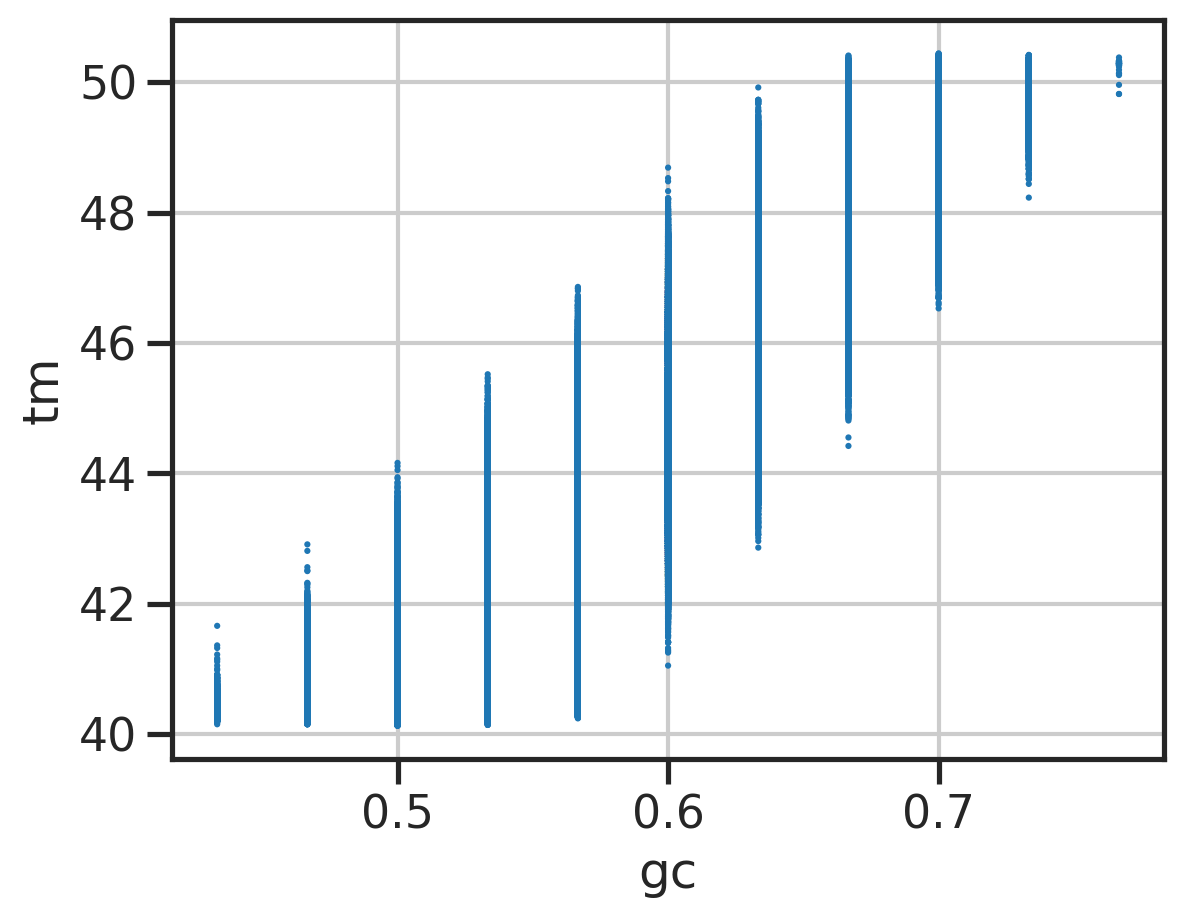

In [10]:
sns.scatterplot(data=df2, x='gc', y='tm', edgecolor='none', s=5) 

<AxesSubplot:xlabel='offscore', ylabel='maxkmer'>

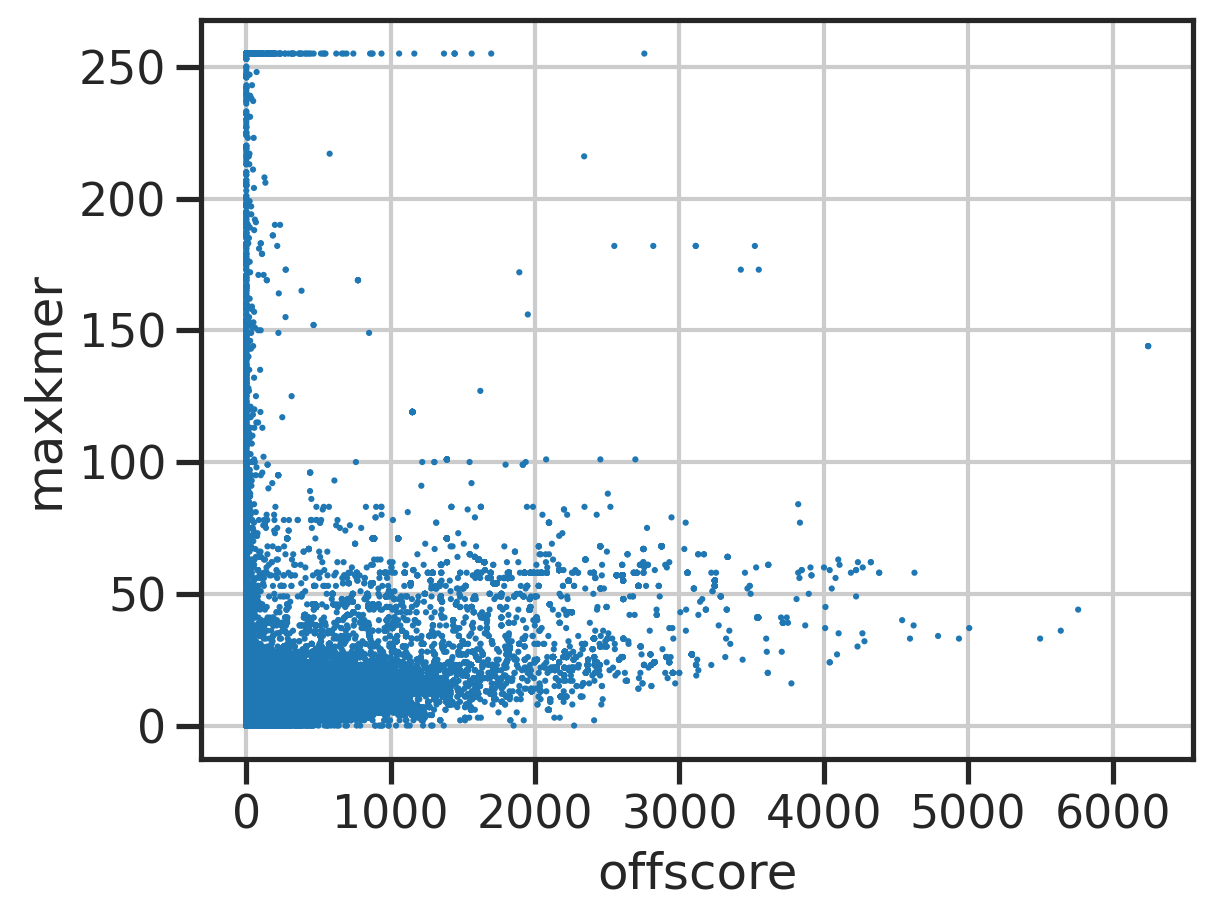

In [11]:
sns.scatterplot(data=df2, x='offscore', y='maxkmer', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='offscore'>

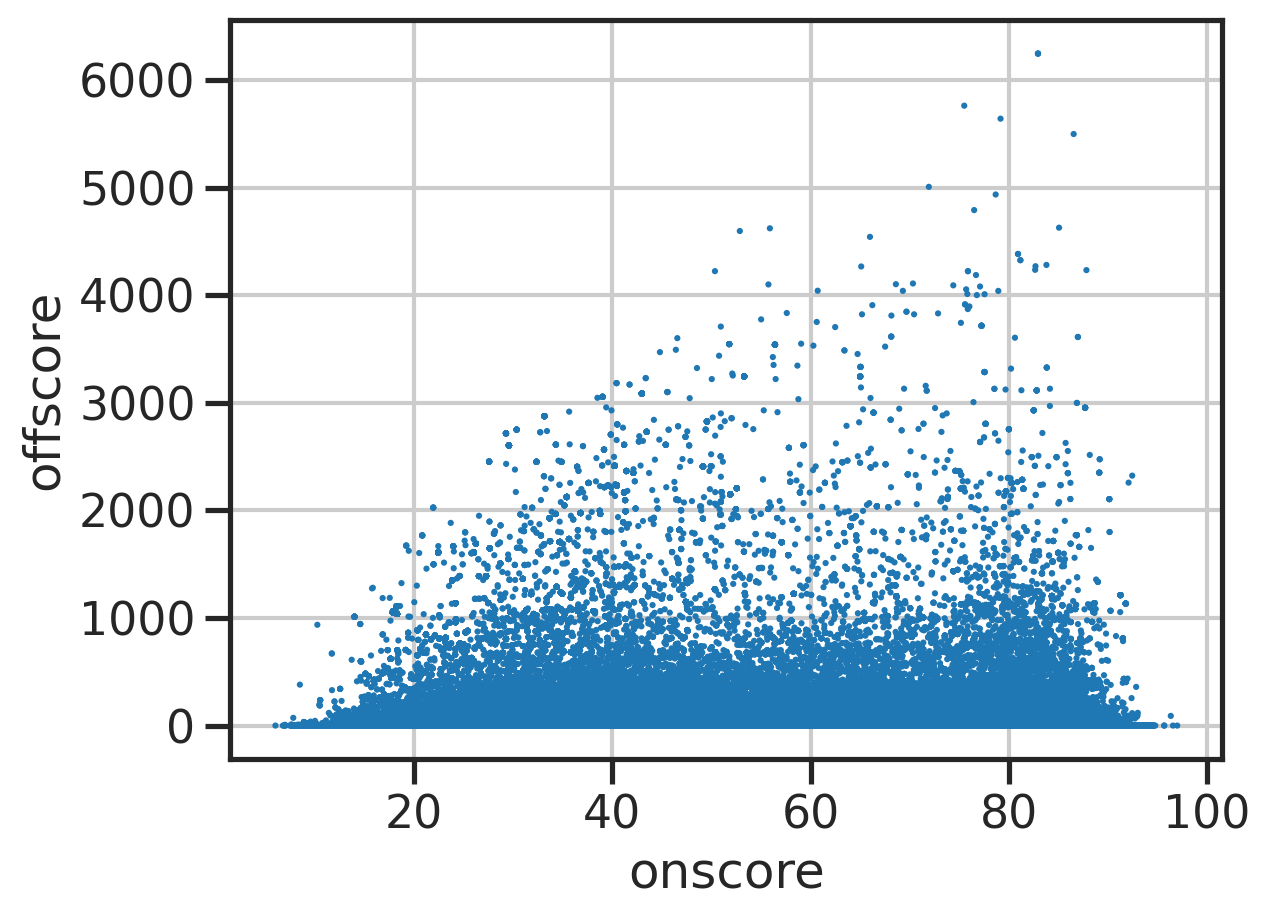

In [12]:
sns.scatterplot(data=df2, x='onscore', y='offscore', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='prob'>

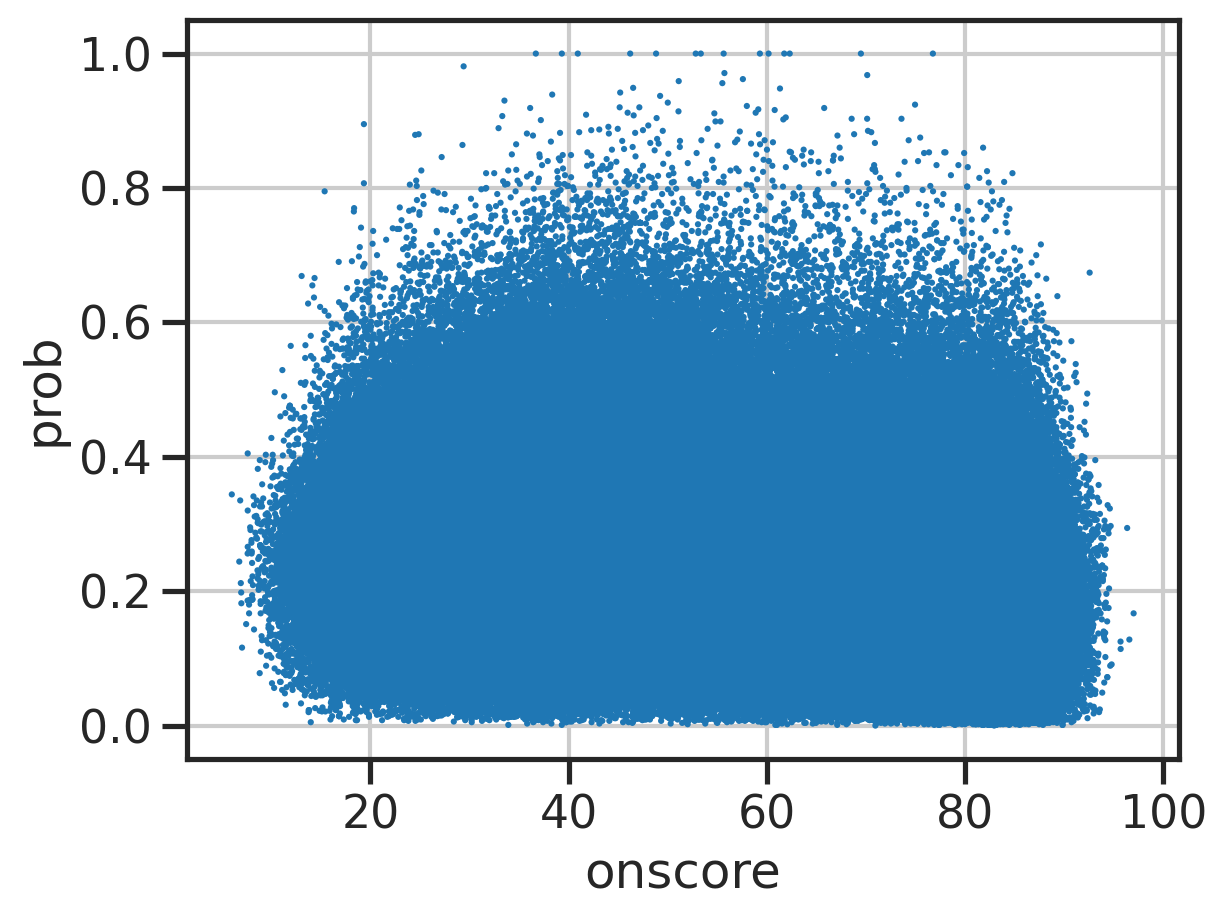

In [13]:
sns.scatterplot(data=df2, x='onscore', y='prob', edgecolor='none', s=5) 

In [14]:
gene_cnstrnts = df2.groupby('gname').size()
gene_cnstrnts_v3 = df3.groupby('gname').size()# .reindex(gene_constraints.index)
gene_cnstrnts_v4 = df4.groupby('gname').size()# .reindex(gene_constraints.index)

# cnstrnts = pd.DataFrame(gene_cnstrnts)
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts

Text(0, 0.5, 'Num. probes')

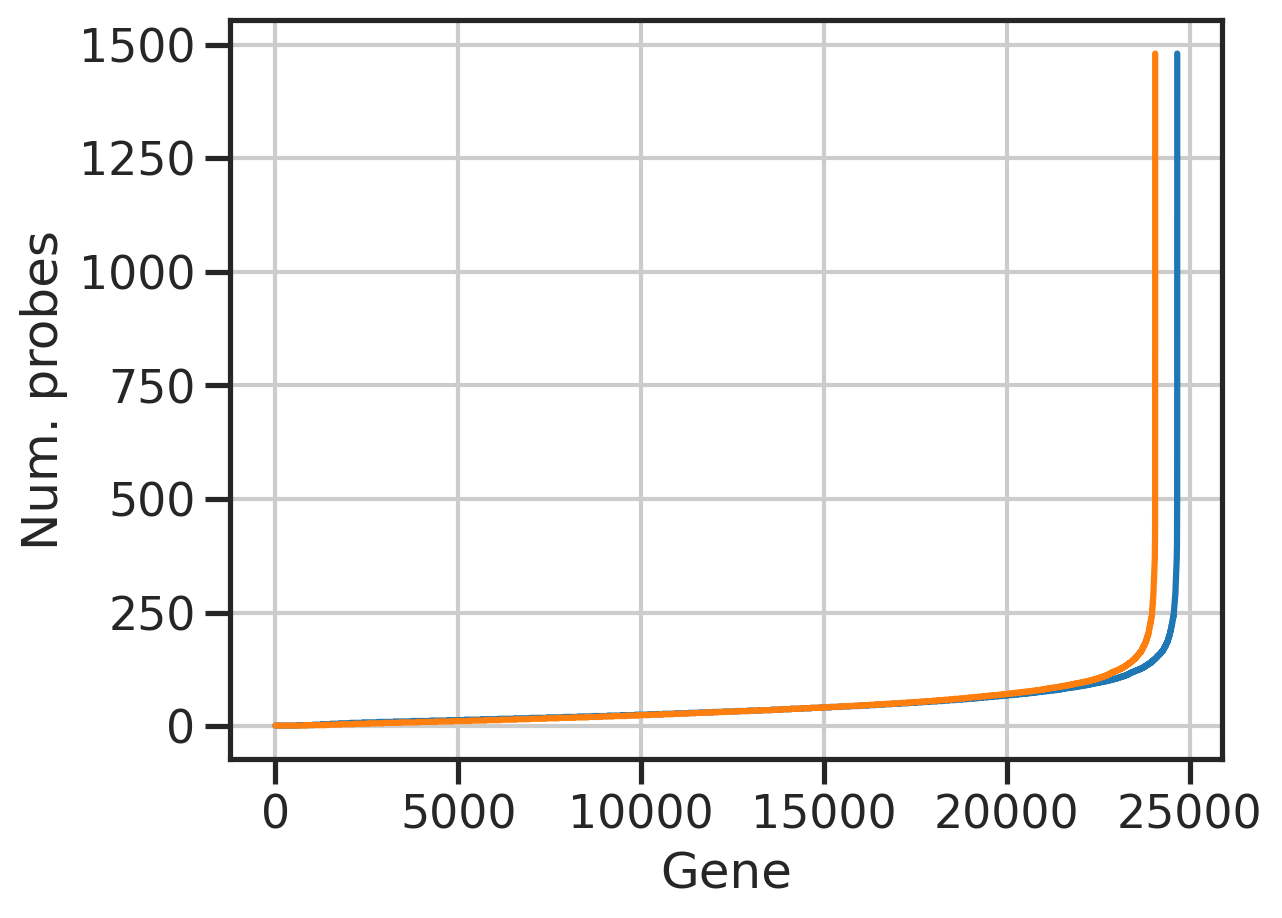

In [15]:
plt.plot(np.sort(gene_cnstrnts))
plt.plot(np.sort(gene_cnstrnts_v3))
plt.plot(np.sort(gene_cnstrnts_v4))
plt.xlabel('Gene')
plt.ylabel('Num. probes')

In [16]:
df2[df2['maxkmer'] > 200]

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
1260,chr1,11596171,11596200,GCTGCTGCTGCTGCTGTTTTAATCCTTTCG,40.88,43.389,0.000,0,0.110,255,-,A830018L16Rik,7,30,0.500000
1530,chr1,13114395,13114424,TGCAAAGGCTTTACCACAATGCTTGCACTT,40.38,22.742,0.000,0,0.137,255,+,Prdm14,1,30,0.433333
3766,chr1,24028533,24028562,TCTTGATCCTCCTCTTCCTCCTCTTTGCCC,40.81,45.180,0.000,0,0.696,255,+,Fam135a,1,30,0.533333
4542,chr1,32472573,32472602,GGTGGTGGTGGTGGTGGAACAGCACCGCCA,48.93,81.522,0.000,0,0.221,255,-,Khdrbs2,1,30,0.666667
4768,chr1,33746332,33746361,CCCCACACACACACACACTACATGTGCATC,41.35,43.755,15.386,0,0.242,255,+,Bag2,1,30,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119594,chrX,151344337,151344366,CAGGTGCTGCTGCTGCTGCTGGCGCGAGAC,49.59,86.817,0.000,0,0.113,255,-,Fam120c,1,30,0.700000
1122375,chrX,160797118,160797147,CACACATACACACACACCTGTGGAACTCCA,40.36,27.664,0.000,0,0.264,255,-,Rs1,1,30,0.500000
1123466,chrX,166457642,166457671,TTCTCCACCTTTCTGTGTGTGTGTGTGTGT,40.28,26.092,41.329,0,0.512,255,+,Rab9,1,30,0.466667
1124063,chrX,169778095,169778124,AAGGATGATGCCCTCCAGATCCAGACAACT,40.88,23.961,0.000,0,0.287,255,+,4933400A11Rik,1,30,0.500000


In [17]:
df2[df2['maxkmer'] == 5]

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
113,chr1,4492547,4492576,CTTGCGCCGCCGCGGCCGGTACTTGTAGTT,49.05,85.734,0.000,0,0.094,5,+,Sox17,5,30,0.666667
188,chr1,4893451,4893480,GCTCCCTGATGGCTTCTTTGGTCAGGTTTT,40.99,37.208,86.425,0,0.250,5,-,Tcea1,3,30,0.500000
192,chr1,4896523,4896552,CCAGCTGATCTGAGACCACAGAAGGCATTT,40.40,30.792,74.116,0,0.290,5,-,Tcea1,3,30,0.500000
614,chr1,9545536,9545565,CTCTGCCTTGGCCAGCAGCTCCTCCACGCG,48.94,81.537,129.623,0,0.203,5,-,Rrs1,1,30,0.700000
625,chr1,9546040,9546069,CACGCGTTCTTTCTTGGCCTGAGTCCTCTT,42.20,46.391,120.126,0,0.353,5,-,Rrs1,1,30,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124948,chrY,17401455,17401484,GGCTGCCTCCTCCTCTCCAGTTGTTTTCTA,41.28,42.410,59.733,0,0.454,5,-,Gm21379,1,30,0.533333
1124949,chrY,17401455,17401484,GGCTGCCTCCTCCTCTCCAGTTGTTTTCTA,41.28,42.410,59.733,0,0.454,5,-,Rbm31y,1,30,0.533333
1124964,chrY,17402254,17402283,CCAGTACTTCCTCCTCTTCCAACTGTCCCA,40.67,31.652,41.403,0,0.281,5,-,Gm21379,1,30,0.533333
1124965,chrY,17402254,17402283,CCAGTACTTCCTCCTCTTCCAACTGTCCCA,40.67,31.652,41.403,0,0.281,5,-,Rbm31y,1,30,0.533333


In [19]:
import Bio.SeqUtils.MeltingTemp as mt

In [32]:
def recalc_tm(seq, fmd=30, Na=300, dnac1=2, dnac2=2):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    

In [33]:
dfviz = df.iloc[:10000].copy()
dfviz['dfttm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=50, Na=390, dnac1=25, dnac2=25))
dfviz['newtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x))
dfviz['newtm2'] = dfviz['seq'].apply(lambda x: recalc_tm(x, dnac2=0.001))
dfviz

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc,dfttm,newtm,newtm2
0,chr1,3214512,3214541,AAAGCACCATGACCAAGGACACCGAAAACA,41.02,35.893,0.0,0,0.455,25,+,Xkr4,1,30,0.466667,41.020764,50.077835,50.765633
1,chr1,3214544,3214573,AAGCGGGAATGTTTACTTGCTGTGTGGAGG,41.07,49.515,0.0,0,0.346,2,+,Xkr4,1,30,0.500000,41.067468,50.153050,50.835922
2,chr1,3214631,3214660,CTTAGCTGATGGAGTGGTAAGCCCTCAAGC,40.41,32.113,0.0,0,0.313,0,+,Xkr4,1,30,0.533333,40.410075,49.495731,50.178578
3,chr1,3214754,3214783,TGACCTTGGATGGGAAGAGGGTAAGTCTGT,40.37,21.619,0.0,0,0.330,2,+,Xkr4,1,30,0.500000,40.366396,49.328106,50.032364
4,chr1,3214880,3214909,AAATTTGGCACTCGAAAGATGTGGCACGTG,40.46,26.984,0.0,0,0.190,0,+,Xkr4,1,30,0.466667,40.461525,49.618323,50.288876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr1,45334275,45334304,CTTTAGGACCAGGGAAACCCATGACACCAG,40.41,42.248,0.0,0,0.356,2,-,Col3a1,1,30,0.533333,40.414646,49.453836,50.144712
9996,chr1,45334618,45334647,AAGGCCAGGTCCTCCAGGGCCACCCCGTTC,49.67,75.721,0.0,0,0.111,2,-,Col3a1,1,30,0.700000,49.666203,58.568312,59.283046
9997,chr1,45334769,45334798,CCCTGAGGTCCAGTCTCCCCATTCTTTCCA,42.52,43.435,0.0,0,0.280,3,-,Col3a1,1,30,0.566667,42.518807,51.472310,52.178028
9998,chr1,45335748,45335777,TCACCTGGTTTCCCATTTTCTCCTGGAGGA,40.98,28.494,0.0,0,0.103,0,-,Col3a1,1,30,0.500000,40.982579,49.933472,50.639610


In [34]:
dfviz['zhuanglab'] = dfviz['seq'].apply(lambda x: recalc_tm(x, Na=300, fmd=0, dnac1=5, dnac2=5))

Text(0, 0.5, 'our setting TM')

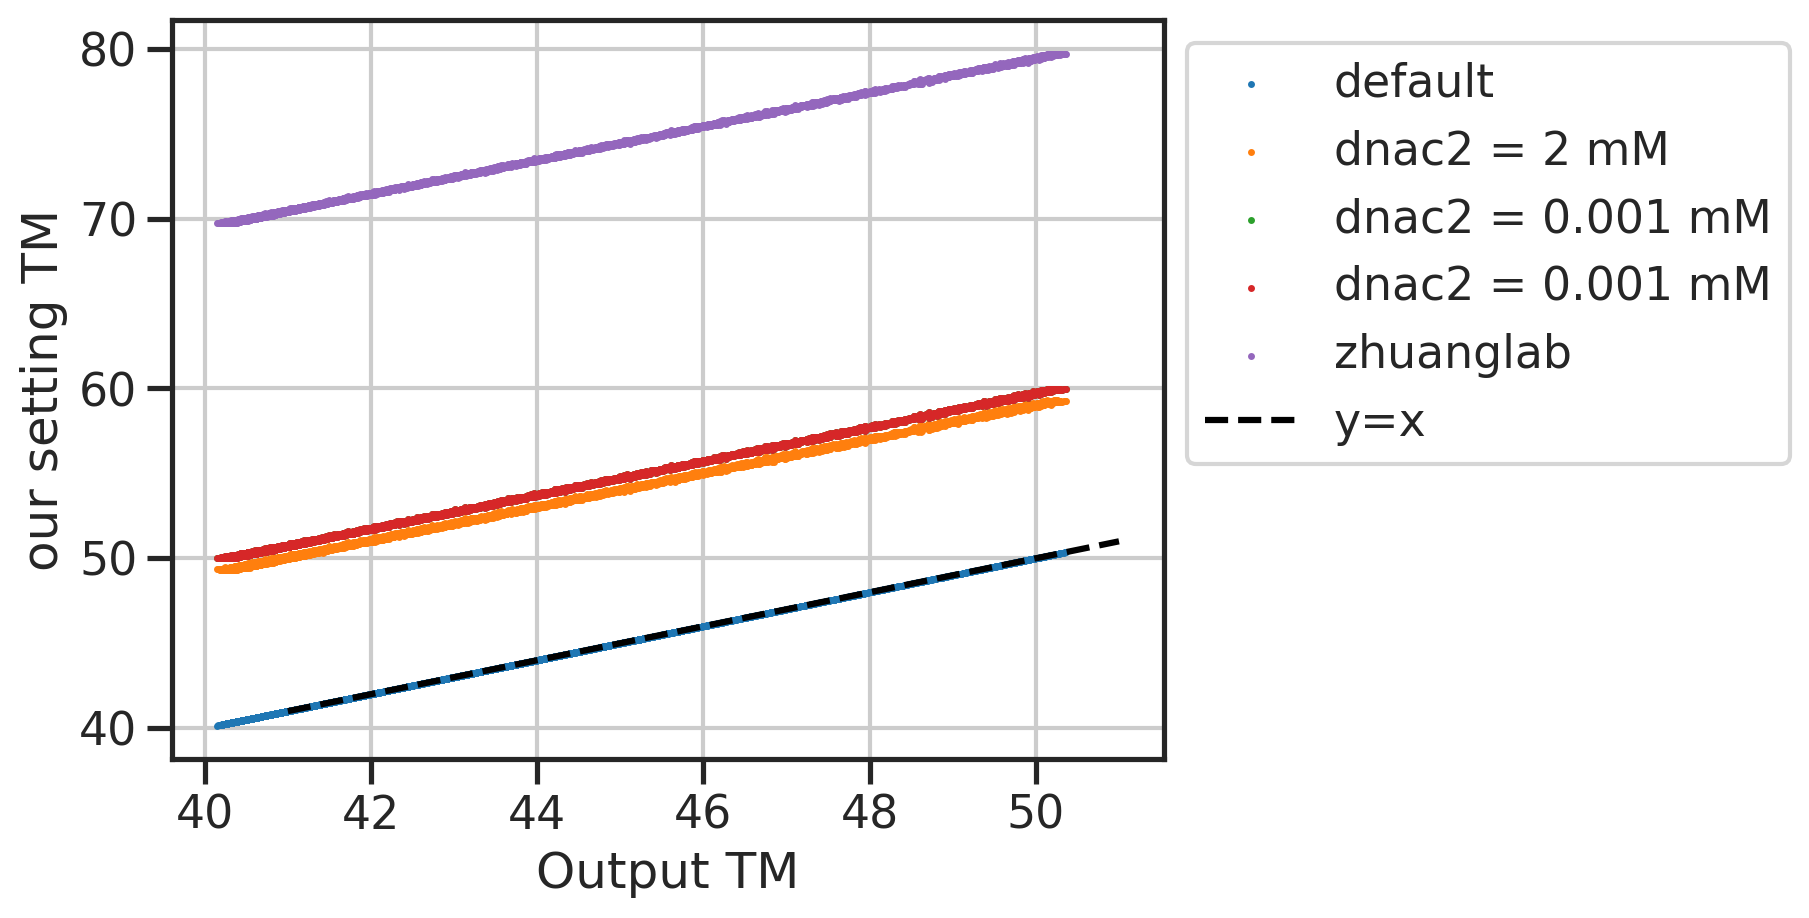

In [35]:
plt.scatter(dfviz['tm'].values, 
            dfviz['dfttm'].values,
            s=1,
            label="default",
            ) 

plt.scatter(dfviz['tm'].values, 
            dfviz['newtm'].values,
            s=1,
            label="dnac2 = 2 mM",
            ) 

plt.scatter(dfviz['tm'].values, 
            dfviz['newtm2'].values,
            s=1,
            label="dnac2 = 0.001 mM",
            ) 

plt.scatter(dfviz['tm'].values, 
            dfviz['newtm2'].values,
            s=1,
            label="dnac2 = 0.001 mM",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['zhuanglab'].values,
            s=1,
            label="zhuanglab",
            ) 
plt.plot([41, 51], [41,51], '--k', label='y=x')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Output TM")
plt.ylabel("our setting TM")
